In [2]:
import pandas as pd

In [52]:
# from Baseball Savant, get first pitch strike% using TY and LY data
# min pa = 50
def read_fps(year):
    df = pd.read_csv(f'Pitcher Control {year - 1}-{year}.csv', index_col=False).drop('Unnamed: 8', axis=1)
                
    # for LY data, give it half-weight
    df.loc[df['year'] < year, 'p_formatted_ip'] /= 2
    
    # calculate the weighted launch angle
    df['FPS'] = df['p_formatted_ip'] * df['f_strike_percent']
    df_grouped = df.groupby(['player_id']).sum()
    df_grouped['FPS%'] = df_grouped['FPS'] / df_grouped['p_formatted_ip']
    df_grouped = df_grouped[df_grouped['year'] >= year]
    
    # join with player ids
    player_map = pd.read_csv('../PLAYERIDMAP 2022.csv')[['MLBID', 'PLAYERNAME']].set_index('MLBID')
    merge = df_grouped[['FPS%']].merge(player_map, how='left', left_index=True, right_index=True)[['PLAYERNAME', 'FPS%']]
    
    mean = merge['FPS%'].mean()
    std = merge['FPS%'].std()
    
    merge['Z'] = (merge['FPS%'] - mean) / std
    
    return merge

fps_data = read_fps(2022)
fps_data.head()

,PLAYERNAME,FPS%,Z
425794,Adam Wainwright,63.230382,0.491192
425844,Zack Greinke,65.261124,1.000045
434378,Justin Verlander,62.000000,0.182888
434671,Anibal Sanchez,57.400000,-0.969758
445276,Kenley Jansen,66.633503,1.343929


In [38]:
(2.137375 - -2.748842) / 110

0.044420154545454546

0.6244009161836321
-3.074589390580872
3.7938206874390814
0.06244009161836322


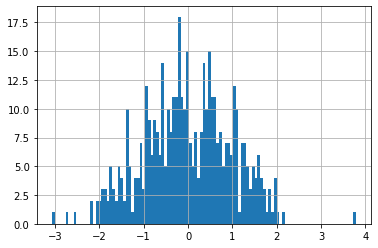

In [32]:
print((fps_data['Z'].max() - fps_data['Z'].min()) / 11)
print(fps_data['Z'].min())
print(fps_data['Z'].max())
print((fps_data['Z'].max() - fps_data['Z'].min()) / 110)
hist = fps_data['Z'].hist(bins=111)

In [47]:
def get_ctrl(fps):
    i = 0
    while i < 110:
        floor = -2.1 + (i * 0.04442)
        if fps > floor:
            i += 1
        else:
            break
    return 80 + i
get_ctrl(2.5)

184

In [48]:
def assign_ctrl(year):
    ctrl_data = read_fps(2022)
    ctrl_data['Control'] = ctrl_data.apply(lambda x: get_ctrl(x['Z']), axis=1)
    return ctrl_data[['PLAYERNAME', 'Control']].dropna()

ctrl_df = assign_ctrl(2022)
ctrl_df.head()

,PLAYERNAME,Control
425794,Adam Wainwright,139
425844,Zack Greinke,150
434378,Justin Verlander,132
434671,Anibal Sanchez,106
445276,Kenley Jansen,158


In [50]:
ctrl_df.to_csv('2022_Control.csv')